# Actividad 4: Completar Notebook Vinos

---

***Estudiante:  Jessica Briseño                Fecha: Abril 2024***

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  42.8M      0 --:--:-- --:--:-- --:--:-- 42.8M


In [ ]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [ ]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [ ]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX.head(5)

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

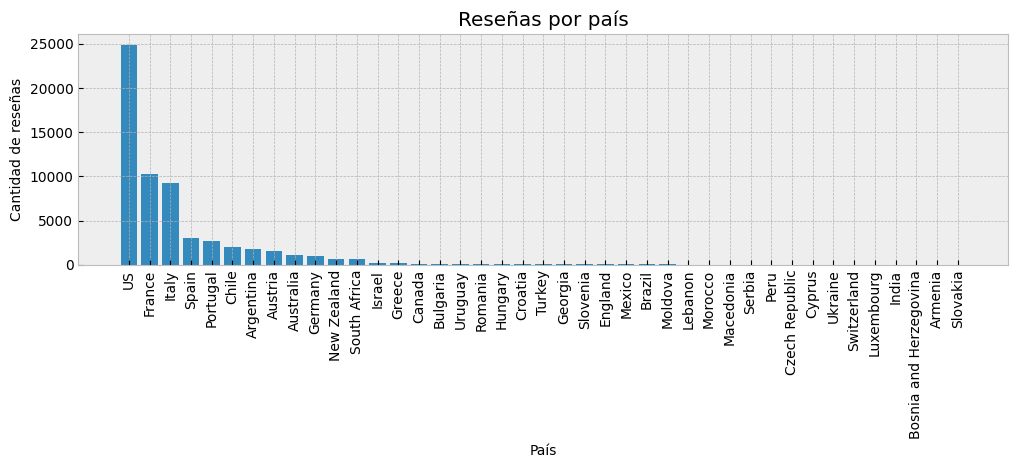

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt        # Importar la libreria

# Guía de estilos:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

conteo = df["country"].value_counts()
x=conteo.index
y=conteo.values

plt.figure(figsize=(12,3))
plt.style.use("bmh")
plt.bar(x,y)                         # Crear gráfico

plt.xlabel("País", fontsize=10)      # Título eje x (rotation='vertical')
plt.ylabel("Cantidad de reseñas", fontsize=10)    # Título eje y
plt.title("Reseñas por país")

#sns.barplot(x:x[:10],y:y[:10])

plt.xticks(x, rotation='vertical')
plt.rc('font', size=8,)
#plt.rc('axes', titlesize=.1)
#plt.margins(0.2)
#plt.subplots_adjust(bottom=0.15)

plt.show()
plt.close('all')                         # Cerrar ventana


In [ ]:
conteos=df.country.value_counts()
x = conteos.index
y = conteos.values
#x[:10]
conteos.index[:10]

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina',
       'Austria', 'Australia', 'Germany'],
      dtype='object', name='country')

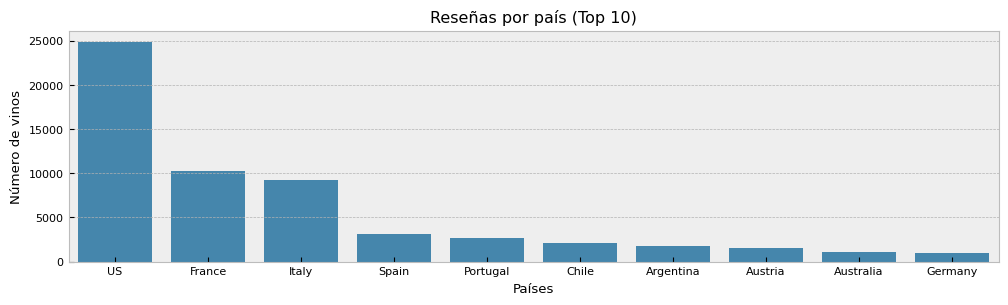

In [ ]:
###################################### Gráfica de reseñas por país    (Opción 1)

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
#6. Usar Seaborn para graficar el diagrama de barras
#7. Rotular la gráfica y los ejes

conteos=df.country.value_counts()
x = conteos.index
y = conteos.values

plt.figure(figsize=(12,3))
sns.barplot(x=conteos.index[:10],y=conteos.values[:10])
# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])
plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

Text(0.5, 1.0, 'Reseñas por país (Top 10)')

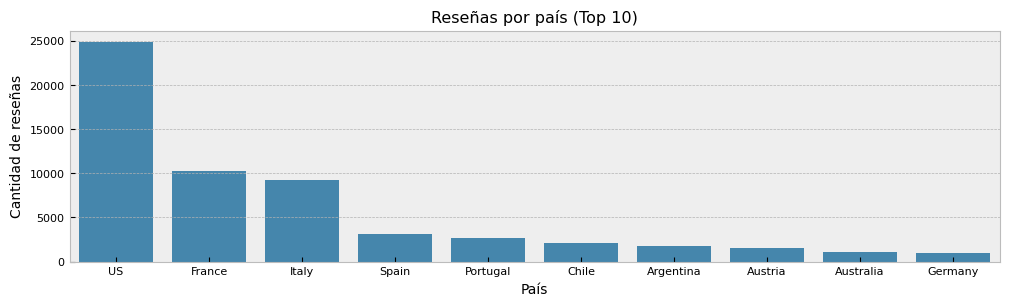

In [ ]:
###################################### Gráfica de reseñas por país    (Opción 2)

plt.figure(figsize=(12,3))
plt.style.use("bmh")
sns.barplot(x=x[:10],y=y[:10])                      # Crear gráfico

plt.xlabel("País", fontsize=10)                     # Título eje x (rotation='vertical')
plt.ylabel("Cantidad de reseñas", fontsize=10)      # Título eje y
plt.title("Reseñas por país (Top 10)")              # Título gráfica

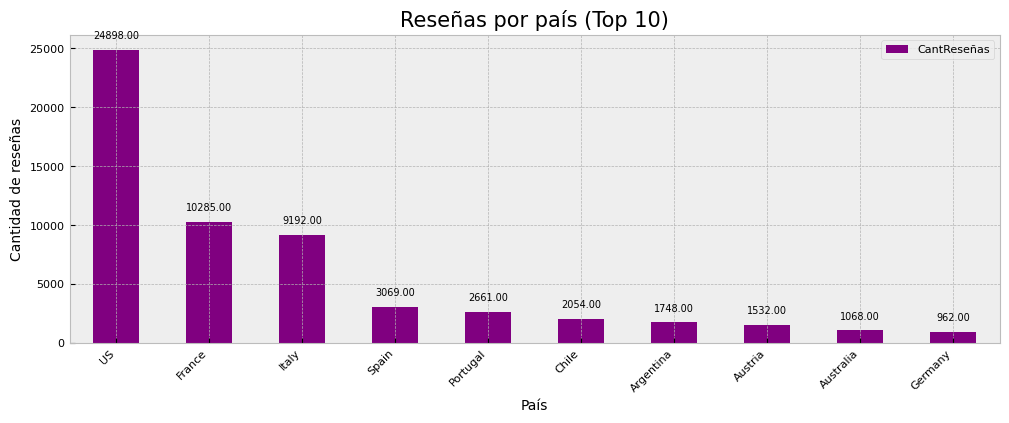

In [ ]:
###################################### Gráfica de reseñas por país    (Opción 3)

import pandas as pd
df_Anotaciones = pd.DataFrame((zip(x[:10],y[:10])), columns = ['pais','CantReseñas'])

ax=df_Anotaciones.plot(x='pais', y='CantReseñas',kind="bar", figsize=(12, 4),
                          color="purple")

plt.title("Reseñas por país (Top 10)", fontsize=15)              # Título gráfica
plt.xlabel("País", fontsize=10)                     # Título eje x (rotation='vertical')
plt.ylabel("Cantidad de reseñas", fontsize=10)      # Título eje y
plt.xticks(rotation=45, ha="right")

# Recorremos cada rectángulo

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=7, color='black',\
                xytext=(0, 10),\
                textcoords='offset points')

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

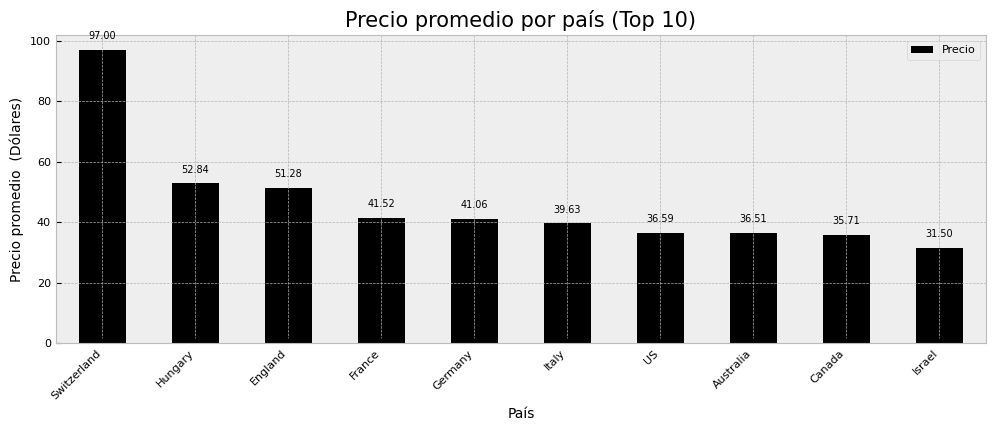

In [ ]:
################################################################################
#  Gráfica de barras el precio promedio por país, en orden descendente (top 10)

# 1. Crear un df, agrupando por país-precio y calcular la media
# 2. Ordenar el df
# 3. Generar un nuevo df para Anotaciones
# 4. Generar la gráfica con anotaciones

promedios = df.groupby("country")["price"].mean()
promedios=promedios.sort_values(ascending=False)

#df_paises = df[df["country"]=="Switzerland"]   #Para comprobar
#df_paises.describe()

x = promedios.index; y = promedios.values

import pandas as pd
df_Anotaciones = pd.DataFrame((zip(x[:10],y[:10])), columns = ['pais','Precio'])

ax=df_Anotaciones.plot(x='pais', y='Precio',kind="bar", figsize=(12, 4),
                       color="black")

plt.title("Precio promedio por país (Top 10)", fontsize=15)              # Título gráfica
plt.xlabel("País", fontsize=10)                     # Título eje x (rotation='vertical')
plt.ylabel("Precio promedio  (Dólares)", fontsize=10)      # Título eje y
plt.xticks(rotation=45, ha="right")

# Recorremos cada rectángulo

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=7, color='black',\
                xytext=(0, 10),\
                textcoords='offset points')

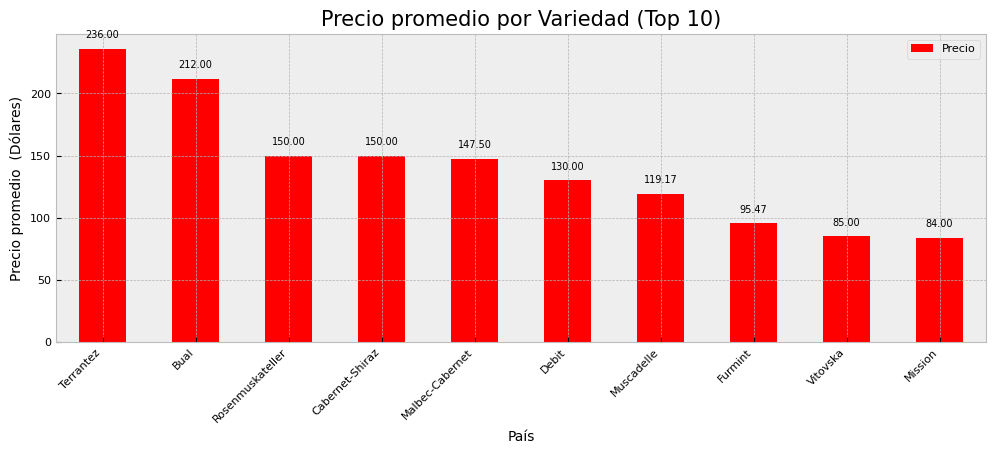

In [ ]:
################################################################################
# Gráfica de barras el precio promedio por variedad, en orden descendente (top 10)
# 1. Crear un df, agrupando por país-precio y calcular la media
# 2. Ordenar el df
# 3. Generar un nuevo df para Anotaciones
# 4. Generar la gráfica con anotaciones

promediosVar = df.groupby("variety")["price"].mean()
promediosVar=promediosVar.sort_values(ascending=False)

x = promediosVar.index; y = promediosVar.values

import pandas as pd
df_AnotacionesVar = pd.DataFrame((zip(x[:10],y[:10])), columns = ['pais','Precio'])

ax=df_AnotacionesVar.plot(x='pais', y='Precio',kind="bar", figsize=(12, 4),
                          color="red")

plt.title("Precio promedio por Variedad (Top 10)", fontsize=15)              # Título gráfica
plt.xlabel("País", fontsize=10)                     # Título eje x (rotation='vertical')
plt.ylabel("Precio promedio  (Dólares)", fontsize=10)      # Título eje y
plt.xticks(rotation=45, ha="right")

# Recorremos cada rectángulo

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=7, color='black',\
                xytext=(0, 10),\
                textcoords='offset points')

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

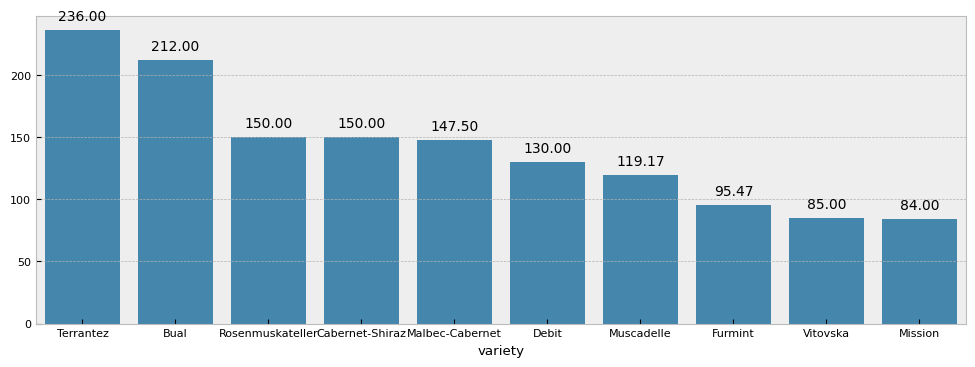

In [ ]:
#Definimos el tamaño del canvas
plt.figure(figsize=(12,4))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x=x[:10], y=y[:10])

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=10, color='black',\
                xytext=(0, 10),\
                textcoords='offset points')
plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

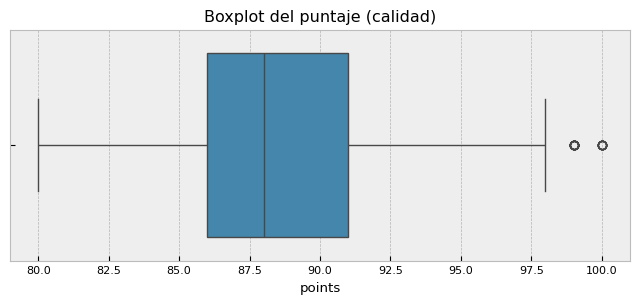

In [ ]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

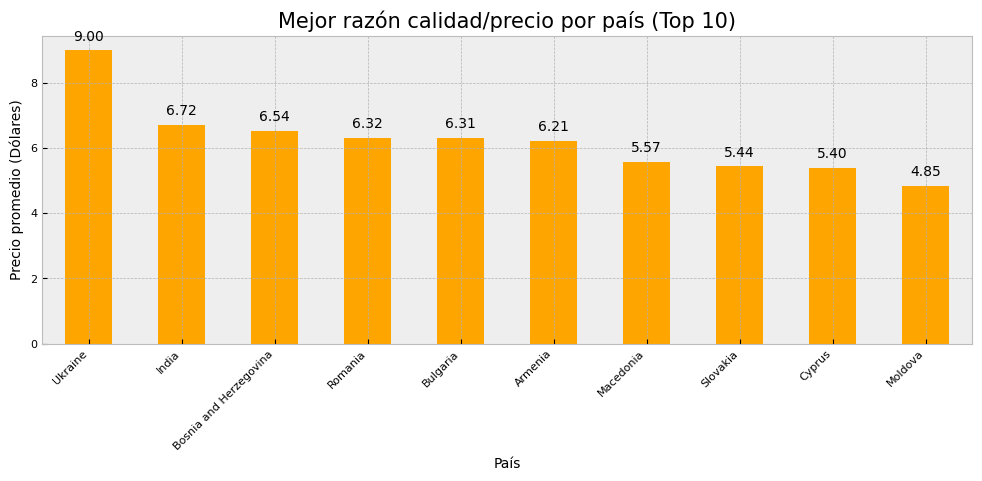

In [ ]:
################################################################################
# Gráfica de barras de la razón (calidad/precio) en orden descendente (top 10)

#1. Agrupa los datos por pais y calcula la razón calidad/precio
#2. Ordena las razones puntos/precio de forma ascendente
#3. Selecciona los 10 paises con las mejores razones
#4. Grafica las 10 mejores raices

import matplotlib.pyplot as plt

promedios=df.groupby("country").apply(lambda x: x["points"].mean() / x["price"].mean())
promedios=promedios.sort_values(ascending=False)
top_10_mejores_raices=promedios.head(10)

ax=top_10_mejores_raices.plot(kind="bar", figsize=(12, 4),
                          color="orange")
plt.title("Mejor razón calidad/precio por país (Top 10)", fontsize=15)
plt.xlabel("País", fontsize=10)      # Título eje x (rotation='vertical')
plt.ylabel("Precio promedio (Dólares)", fontsize=10)    # Título eje y
plt.xticks(rotation=45, ha="right")

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=10, color='black',\
                xytext=(0, 10),\
                textcoords='offset points')


### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

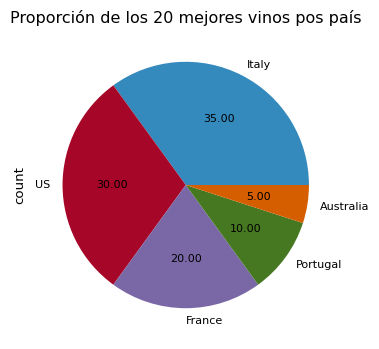

In [ ]:
################################################################################
# Gráfica de barras de los vinos con mejor puntuación y a que paises pertenecen en orden descendente (top 10)

#1. Generar un df con puntuación y paises
#2. Ordena el df mejores razones
#4. Grafica las 10 mejores raices

import matplotlib.pyplot as plt

df_MejoresPunt=df[["country","points"]]

df_MejoresPunt=df_MejoresPunt.sort_values(by="points", ascending=False)
df_MejoresPunt=df_MejoresPunt.head(20)

df_MejoresPunt=df_MejoresPunt["country"].value_counts()


df_MejoresPunt.plot(kind='pie', autopct='%.2f',figsize=(4, 4),
                    title='Proporción de los 20 mejores vinos pos país')

plt.show()

In [ ]:
#TU CODIGO


### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [ ]:
#TU CODIGO
variedadesUva =df["variety"].value_counts().head(10)/len(df)
variedadesUva

variety
Pinot Noir                  0.101608
Chardonnay                  0.089057
Cabernet Sauvignon          0.072556
Red Blend                   0.069656
Bordeaux-style Red Blend    0.052738
Riesling                    0.040103
Sauvignon Blanc             0.039070
Syrah                       0.031669
Rosé                        0.026502
Merlot                      0.023535
Name: count, dtype: float64

### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [ ]:
#TU CODIGO
bodegas = df["winery"].value_counts().head(20)/len(df)
bodegas

winery
Georges Duboeuf               0.001817
Wines & Winemakers            0.001783
Testarossa                    0.001617
Louis Latour                  0.001450
Chateau Ste. Michelle         0.001433
Williams Selyem               0.001433
DFJ Vinhos                    0.001433
Concha y Toro                 0.001300
Gary Farrell                  0.001233
Lynmar                        0.001200
Kendall-Jackson               0.001133
Robert Mondavi                0.001083
Columbia Crest                0.000950
Trapiche                      0.000950
Undurraga                     0.000933
Siduri                        0.000917
Albert Bichot                 0.000917
Jean-Luc and Paul Aegerter    0.000883
Casa Santos Lima              0.000883
Rodney Strong                 0.000883
Name: count, dtype: float64

### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [ ]:
# 1. Filtrar el df original
# 2. Seleccionar sólo las col de interes
# 3. Calcular el valor de puntos/precio
# 4. Cambiar el nombre de la bodega para que incluya su país de origen

variedades_top=df["variety"].value_counts().head(10).index
bodegas_top=df["winery"].value_counts().head(20).index
df_filtrado=df[df["variety"].isin(variedades_top) & df["winery"].isin(bodegas_top)]



tabla=df_filtrado[["country","variety","winery","points","price"]]

tabla["Puntos_precio"]=tabla["points"]/tabla["price"]

tabla["winery"]=tabla["country"]+"-"+tabla["winery"]

tabla=tabla.sort_values(by=["country","variety","winery"])   #,ascending=[True,True,True]).head(5)

tabla.reset_index(drop=True, inplace=True)

tabla

<ipython-input-113-9490aa29662a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla["Puntos_precio"]=tabla["points"]/tabla["price"]
<ipython-input-113-9490aa29662a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla["winery"]=tabla["country"]+"-"+tabla["winery"]


,country,variety,winery,points,price,Puntos_precio
0,Argentina,Cabernet Sauvignon,Argentina-Trapiche,84,10.0,8.400000
1,Argentina,Cabernet Sauvignon,Argentina-Trapiche,88,15.0,5.866667
2,Argentina,Cabernet Sauvignon,Argentina-Trapiche,90,15.0,6.000000
3,Argentina,Cabernet Sauvignon,Argentina-Trapiche,88,10.0,8.800000
4,Argentina,Cabernet Sauvignon,Argentina-Trapiche,91,30.0,3.033333
...,...,...,...,...,...,...
994,US,Syrah,US-Testarossa,85,49.0,1.734694
995,US,Syrah,US-Testarossa,91,54.0,1.685185
996,US,Syrah,US-Testarossa,94,54.0,1.740741
997,US,Syrah,US-Testarossa,94,54.0,1.740741


#### &#9758; Observa la relación puntos-precio por país

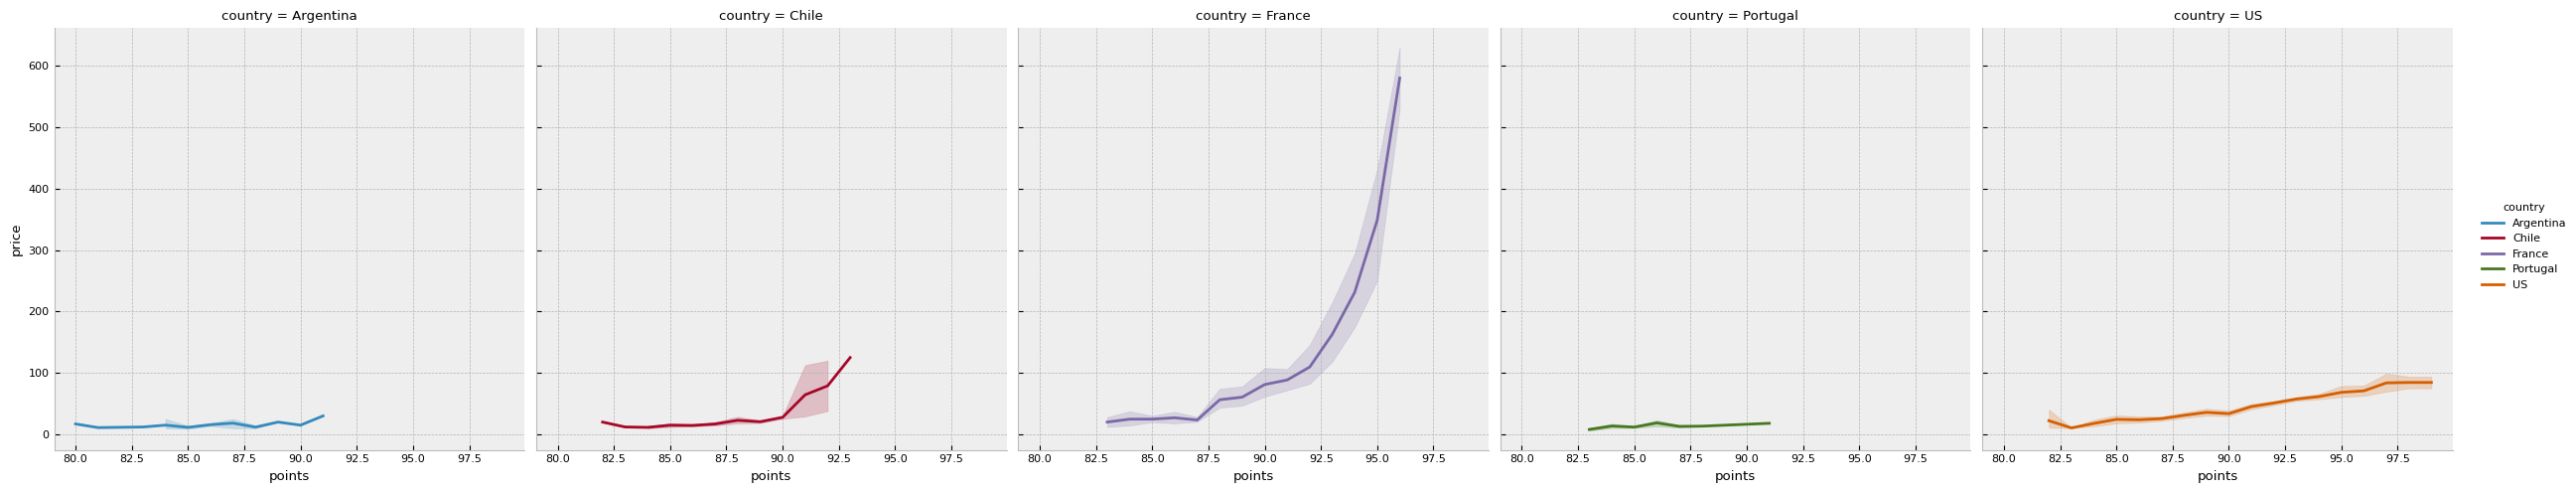

In [ ]:
import seaborn as sns
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=tabla)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

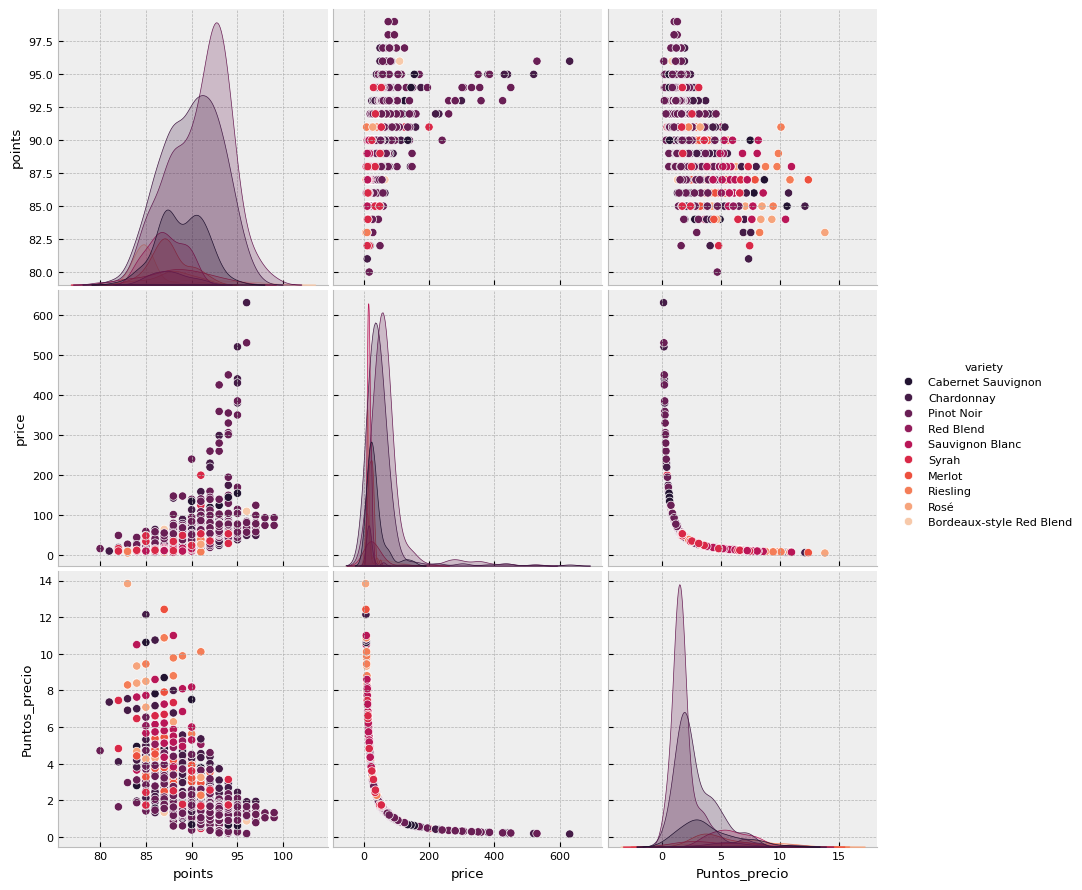

In [ ]:
sns.pairplot(tabla, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

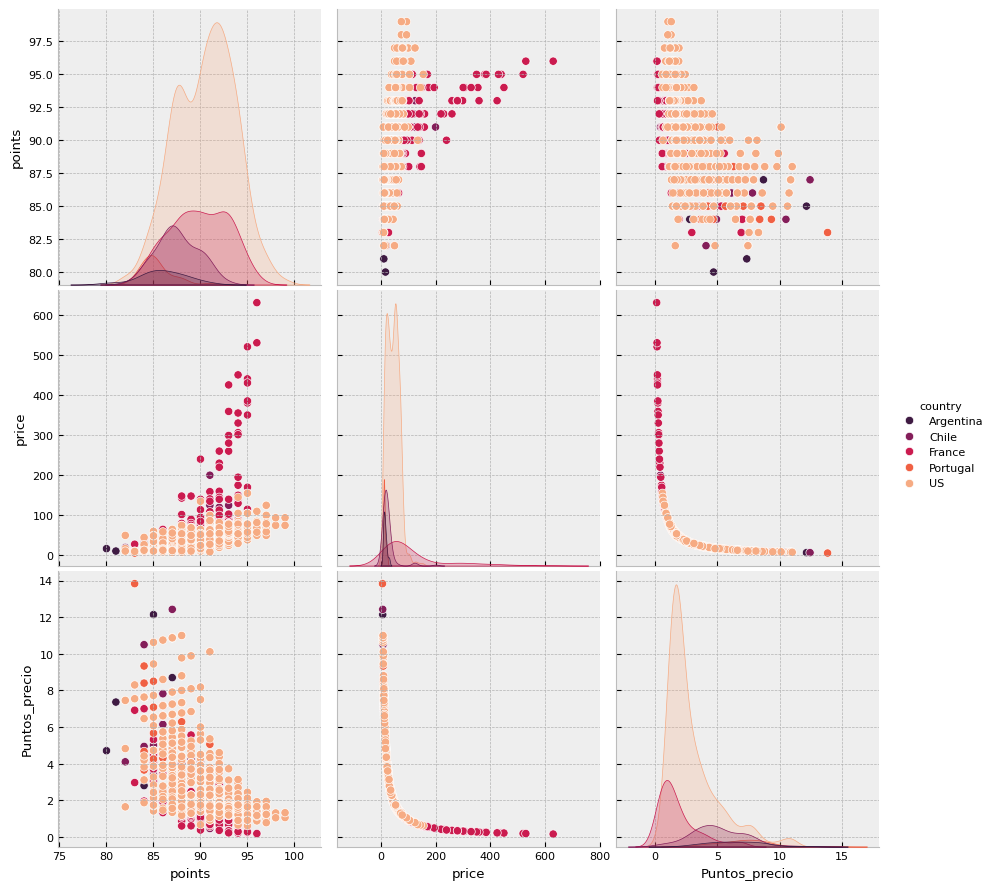

In [ ]:
sns.pairplot(tabla, hue="country",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función de la bodega.

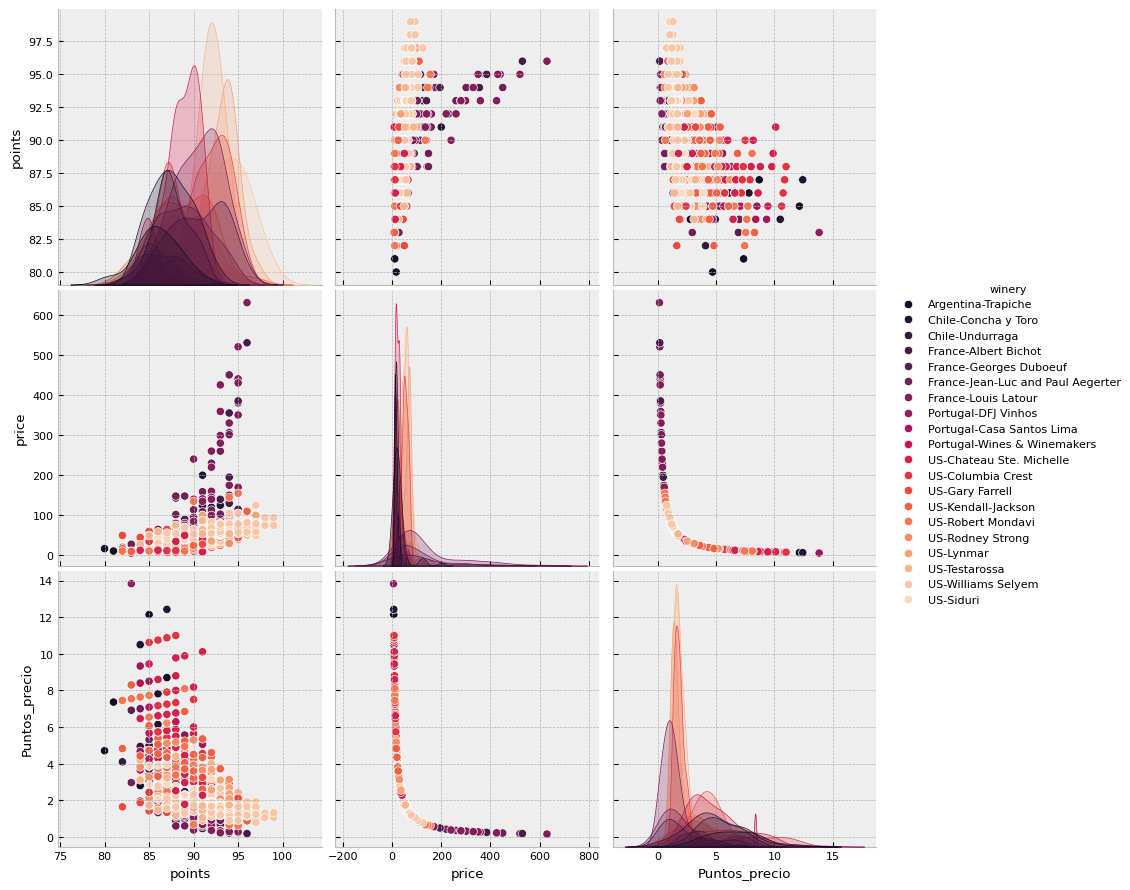

In [ ]:
sns.pairplot(tabla, hue="winery",height=3,palette='rocket')


#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

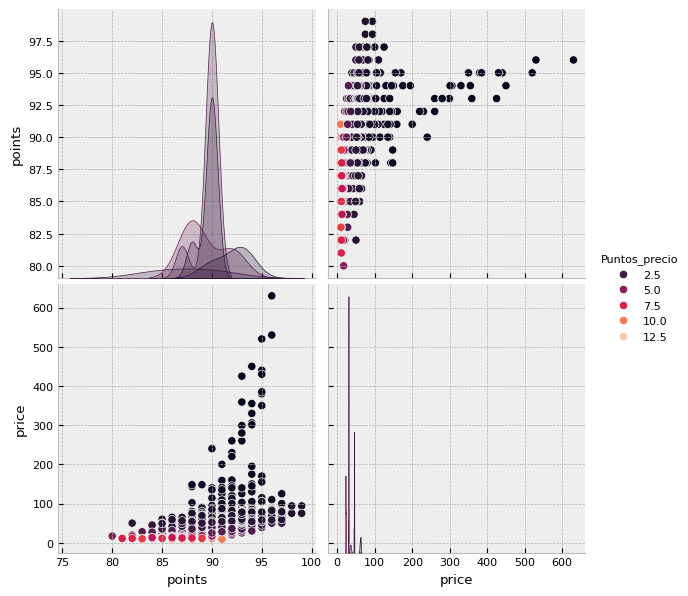

In [ ]:
sns.pairplot(tabla, hue="Puntos_precio",height=3,palette='rocket')



#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

In [ ]:
sns.pairplot(tabla, hue="country",height=3,palette='rocket')


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

In [ ]:
#TU CODIGO


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

In [ ]:
#TU CODIGO


### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [ ]:
#TU CODIGO
df3 = #<COMPLETA> # nuevo dataFrame que contiene la unión de las tablas

#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [ ]:
# TU CODIGO
tabla_completa["puntos_precio2"]=tabla_completa["points"]/tabla_completa["price"]
tabla_completa

#### &#9758; Observa la relación puntos-precio por país

In [ ]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=tabla_completa)

NameError: name 'df3' is not defined

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

In [ ]:
mx_top = #<COMPLETA>
sns.pairplot(mx_top, hue="country",height=3,palette='bright')

SyntaxError: invalid syntax (<ipython-input-121-9f3136fdea60>, line 1)

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

In [ ]:
medias = #<COMPLETA>

# TU CODIGO


#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

In [ ]:
# TU CODIGO
